In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "pizza sales cleaned.csv"
pizza_sales_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
pizza_sales_df.head()

,pizza_id,order_id,unit_price,quantity,month,hour,total_price,pizza_size,pizza_category
0,1.0,1.0,13.25,1.0,1,11,13.25,M,Classic
1,2.0,2.0,16.00,1.0,1,11,16.00,M,Classic
2,3.0,2.0,18.50,1.0,1,11,18.50,L,Veggie
3,4.0,2.0,20.75,1.0,1,11,20.75,L,Supreme
4,5.0,2.0,16.00,1.0,1,11,16.00,M,Veggie


In [2]:
# Check for missing values in the dataset
missing_values = pizza_sales_df.isnull().sum()
missing_values


,0
pizza_id,0
order_id,0
unit_price,0
quantity,0
month,0
hour,0
total_price,0
pizza_size,0
pizza_category,0


In [3]:
# Get a statistical summary of the numeric columns
summary_stats = pizza_sales_df.describe()
summary_stats

,pizza_id,order_id,unit_price,quantity,month,hour,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,16.494132,1.019622,6.432476,15.911806,16.821474
std,14035.529381,6180.119770,3.621789,0.143077,3.435386,3.149836,4.437398
min,1.000000,1.000000,9.750000,1.000000,1.000000,9.000000,9.750000
25%,12155.750000,5337.000000,12.750000,1.000000,3.000000,13.000000,12.750000
50%,24310.500000,10682.500000,16.500000,1.000000,6.000000,16.000000,16.500000
75%,36465.250000,16100.000000,20.250000,1.000000,9.000000,18.000000,20.500000
max,48620.000000,21350.000000,35.950000,4.000000,12.000000,23.000000,83.000000


# **Business Question 1: What is the Monthly Sales Trend**

In [4]:
# 1. Monthly Sales Trend
monthly_sales = pizza_sales_df.groupby("month")["total_price"].sum()
monthly_sales

,total_price
month,
1,71620.15
2,64419.45
3,71301.40
4,70312.00
5,67648.80
6,68161.45
7,70880.65
8,69497.30
9,63803.70


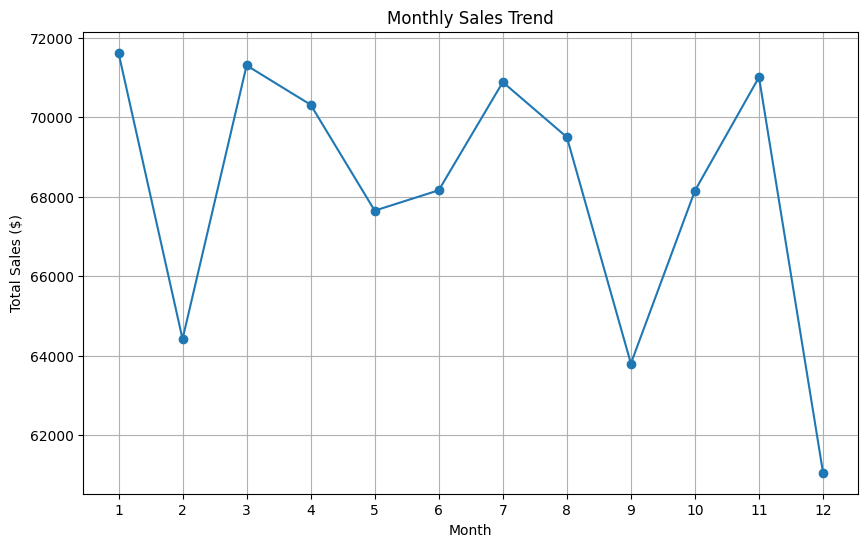

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.xticks(monthly_sales.index)
plt.show()

**Explanation:** The dataset was categorized by the month and the total sales were determined for all of those months. The Vuisualisation illustrates variations in monthly sales.

**Result & Interpretation:** Total sales peaked in January at 71,620.15 dollars, "The lowest sales that were reported in December", totaling $61,058.10. This suggests there might be seasonal influences, during which early months exhibit stronger sales performance. This realization can inform inventory and promotional strategies.

# **Business Question 2: What are Popular Pizza Categories**

In [6]:
# 2. Popular Pizza Categories
category_sales = pizza_sales_df.groupby("pizza_category")["total_price"].sum()
category_sales

,total_price
pizza_category,
Chicken,195919.50
Classic,220053.10
Supreme,208197.00
Veggie,193690.45


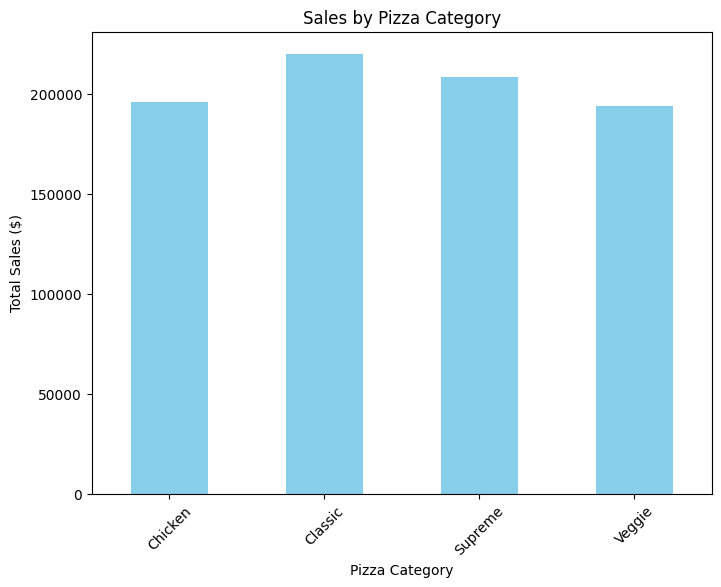

In [7]:
plt.figure(figsize=(8, 6))
category_sales.plot(kind="bar", color="skyblue")
plt.title("Sales by Pizza Category")
plt.xlabel("Pizza Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

**Explanation:** The dataset was arranged by pizza_category, and the total sales were calculated for each of the categories. The bar chart depicted the top pizza categories that were chosen.

**Result & Interpretation:** The Classic pizza section achieved the highest revenues of 220,053.10 dollars, then the Supreme category with 208,197.00, Chicken pizza at 195,919.50, and Veggie coming close at 193,690.45. This implies that customers favor the Classic pizza, giving valuable information on customer preferences.


# **Business Question 3: What are Best-selling Pizza Sizes?**

In [8]:
# 3. Best-selling Pizza Sizes
size_sales = pizza_sales_df.groupby("pizza_size")["total_price"].sum()
size_sales

,total_price
pizza_size,
L,375318.70
M,249382.25
S,178076.50
XL,14076.00
XXL,1006.60


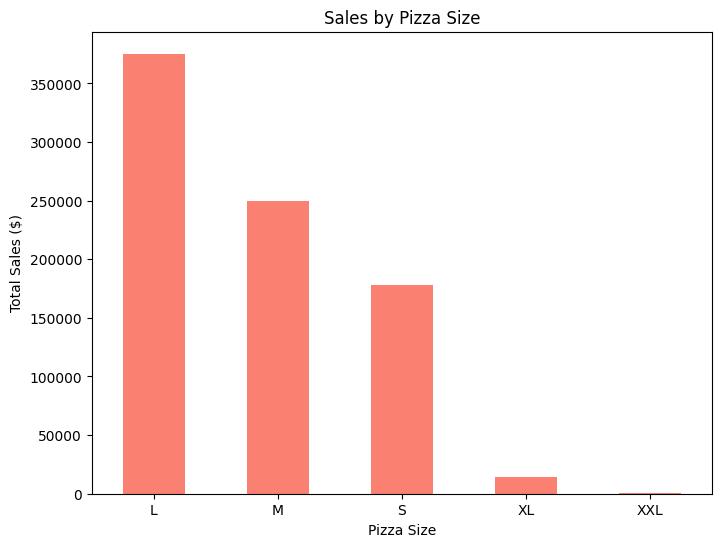

In [9]:
plt.figure(figsize=(8, 6))
size_sales.plot(kind="bar", color="salmon")
plt.title("Sales by Pizza Size")
plt.xlabel("Pizza Size")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=0)
plt.show()

**Explanation:** The dataset was compiled according to pizza_size, and the total sales for each size were calculated. A bar chart presented the sales for each size of pizza.


**Result & Interpretation:** The great success of the L-sized pizza was evidenced by a revenue of 375,318.70, trailed by M-sized at $249,382.25, and S-sized at 178,076.50. According to this data, larger pizza sizes have higher popularity, probably due to how they are viewed as better value, influencing inventory and pricing decisions.


# **Business question 4: What are Sales by hour?**

In [10]:
# 4. Sales by Hour
hourly_sales = pizza_sales_df.groupby("hour")["total_price"].sum()
hourly_sales

,total_price
hour,
9,83.00
10,303.65
11,44935.80
12,111877.90
13,106065.70
14,59201.40
15,52992.30
16,70055.40
17,86237.45


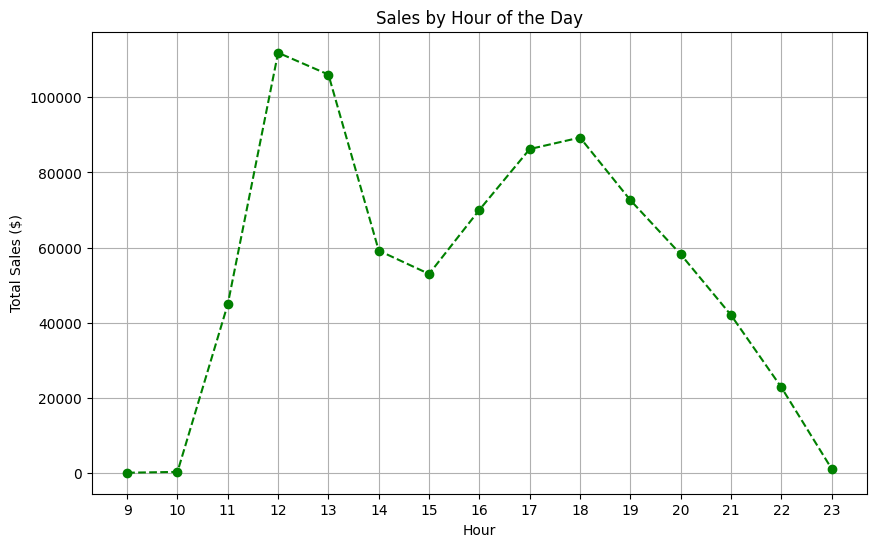

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker="o", linestyle="--", color="green")
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales ($)")
plt.grid(True)
plt.xticks(hourly_sales.index)
plt.show()

**Explanation:** The dataset was organized by hour, and total sales for each hour of the day were computed. A line chart showing hourly sales.


**Result & Interpretation:** At both noon 111,877.90 dollars and 6 PM 89,296.85, sales reached their highest levels. The lowest sales amounted to $83.00 at 9 AM. These perspectives may be put to use for optimizing employee schedules and promotional initiatives during periods of high demand.


# **Business Question 5: Which pizza size and category combination generates the highest revenue?**

In [12]:
# Creating a combination of pizza size and category
pizza_sales_df["size_category_combo"] = pizza_sales_df["pizza_size"] + " - " + pizza_sales_df["pizza_category"]

# Grouping by this combination and calculating total sales
combo_sales = pizza_sales_df.groupby("size_category_combo")["total_price"].sum().sort_values(ascending=False)

combo_sales

,total_price
size_category_combo,
L - Veggie,104202.70
L - Chicken,102339.00
L - Supreme,94258.50
L - Classic,74518.50
S - Classic,69870.25
M - Supreme,66475.00
M - Chicken,65224.50
M - Classic,60581.75
M - Veggie,57101.00


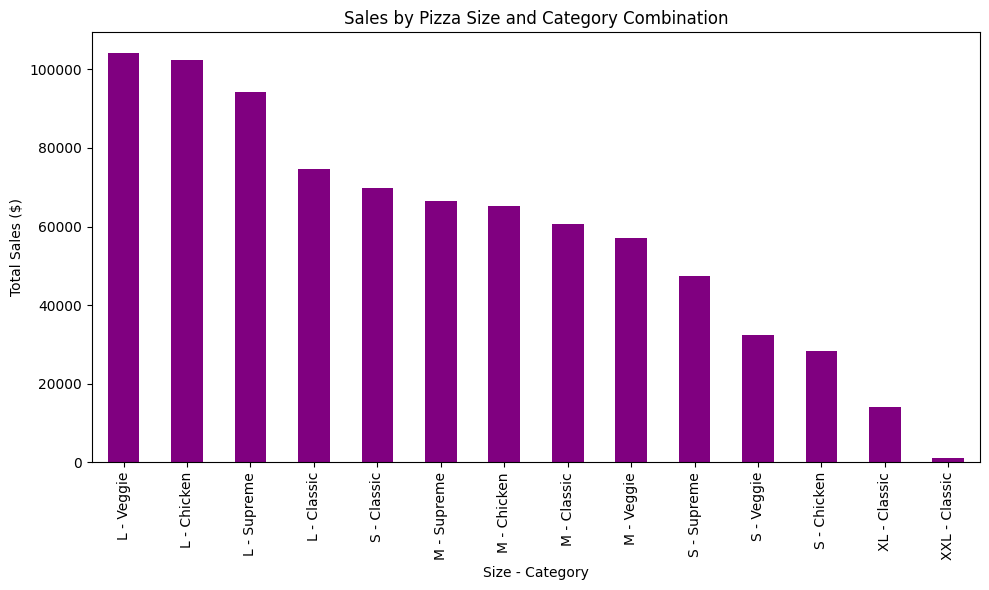

In [13]:
# Visualizing the result
plt.figure(figsize=(10, 6))
combo_sales.plot(kind="bar", color="purple")
plt.title("Sales by Pizza Size and Category Combination")
plt.xlabel("Size - Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Explanation:** A new field combining pizza_size and pizza_category has been formed. The total sales were arranged into groups based on this combination, illustrated in a bar chart.

**Result & Interpretation:** Large Veggie pizza brought in the greatest revenue at 104,202.70, coming in right behind Large Chicken, which achieved 102,339.00. The Medium Supreme combination also showed strong results at $66,475.00. This information can steer specific marketing efforts and menu modifications by emphasizing these most successful procedures and experiments.